In [1]:
import xarray as xr # type: ignore

In [3]:
ds = xr.open_dataset(r'C:\Users\12716\OneDrive\文档\my_draws\all_draw\4.11\cmems_mod_glo_phy_my_0.083deg_P1D-m_1712904851911.nc')

OSError: [Errno -101] NetCDF: HDF error: b'C:\\Users\\12716\\OneDrive\\\xe6\x96\x87\xe6\xa1\xa3\\my_draws\\all_draw\\4.11\\cmems_mod_glo_phy_my_0.083deg_P1D-m_1712904851911.nc'

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (depth: 49, latitude: 301, longitude: 636, time: 1)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 4.833e+03 5.275e+03
  * latitude   (latitude) float32 -5.0 -4.917 -4.833 -4.75 ... 19.83 19.92 20.0
  * longitude  (longitude) float32 117.0 117.1 117.2 117.3 ... 169.8 169.8 169.9
  * time       (time) datetime64[ns] 2020-09-14
Data variables:
    so         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             daily mean fields from Global Ocean Physics Analysis a...
    institution:       MERCATOR OCEAN
    source:            MERCATOR GLORYS12V1
    history:           2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    references:        http://www.mercator-ocean.fr
    comment:           CMEMS product
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_MULTIYEAR_PHY_001_030
    subset:datasetId:  cmems_mod_glo_phy_my_0.083deg_P1D-m_202311
    subset:date:       2024-04-12T06:54:11.918Z

In [ ]:
ds = ds.sel(time='2020-09-14')
ds

<xarray.Dataset>
Dimensions:    (depth: 49, latitude: 301, longitude: 636)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 4.833e+03 5.275e+03
  * latitude   (latitude) float32 -5.0 -4.917 -4.833 -4.75 ... 19.83 19.92 20.0
  * longitude  (longitude) float32 117.0 117.1 117.2 117.3 ... 169.8 169.8 169.9
    time       datetime64[ns] 2020-09-14
Data variables:
    so         (depth, latitude, longitude) float32 ...
    thetao     (depth, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             daily mean fields from Global Ocean Physics Analysis a...
    institution:       MERCATOR OCEAN
    source:            MERCATOR GLORYS12V1
    history:           2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    references:        http://www.mercator-ocean.fr
    comment:           CMEMS product
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_MULTIYEAR_PHY_001_030
    subset:datasetId:  cmems_mod_glo_phy_my_0.083deg_P1D-m_202311
    subset:date:       2024-04-12T06:54:11.918Z

In [ ]:
longitude = ds['longitude'].values
latitude = ds['latitude'].values
depth = ds['depth'].values

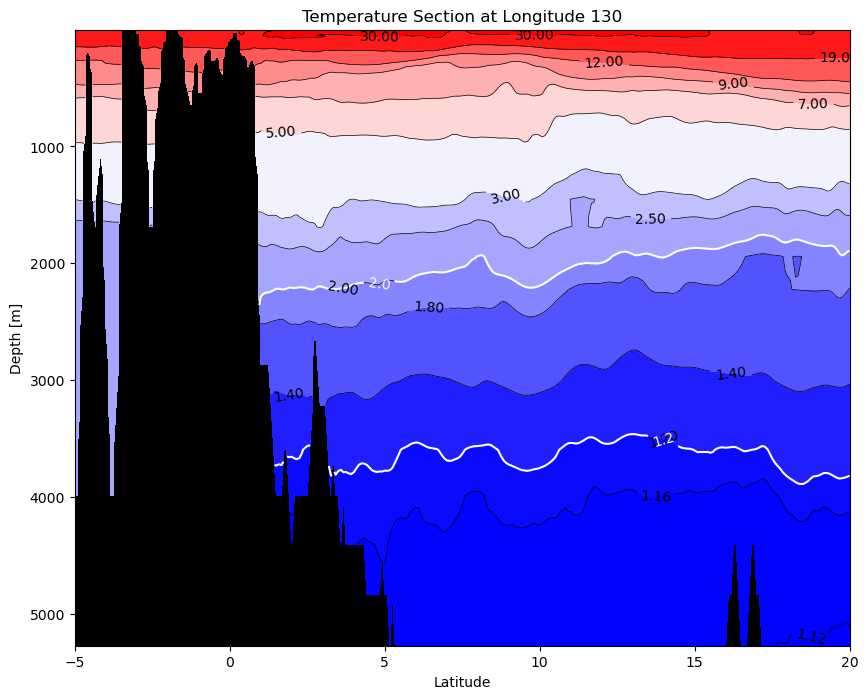

In [ ]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np              # type: ignore
import gsw                      # type: ignore

temperature = ds['thetao'].sel(longitude=130, method='nearest')
salinity = ds['so'].sel(longitude=130, method='nearest')
temperature = temperature.values
salinity = salinity.values
# 计算位温
lat = ds['latitude'].values  # 获取纬度值


pressure = depth * 0.1
pressure_expanded = np.tile(pressure, (301, 1)).T
potential_temperature = gsw.pt0_from_t(salinity, temperature, pressure_expanded)

plt.figure(figsize=(10, 8))
ax = plt.gca()  # 获取当前的Axes对象
ax.set_facecolor('black')  # 设置背景色为黑色

levels = [1.12,1.16,1.2,1.4,1.8,2.0,2.5,3,5,7,9,12,19,30]
plt.contourf(latitude, depth,potential_temperature,levels=levels, cmap='bwr',extend = 'both',norm='symlog')
cor = plt.contour(latitude,depth, potential_temperature ,colors="k", levels=levels, linewidths=0.5)
plt.clabel(cor, inline=True, colors='k')
highlight_lines = plt.contour(latitude, depth,potential_temperature, levels=[1.2, 2.0], colors='white', linewidths=1.5)
plt.clabel(highlight_lines, inline=True, fontsize=10, colors='white')  # 添加标签
plt.title('Temperature Section at Longitude {}'.format(130))
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')
#y_ticks = [0, 250, 500, 750 ,1000, 2000, 3000, 4000, 5000]
#ax.set_yticklabels([f"{tick}" for tick in y_ticks])

ax.set_xlim(-5, 20)
plt.gca().invert_yaxis()  # 深度轴反向，使表面在上

plt.show()


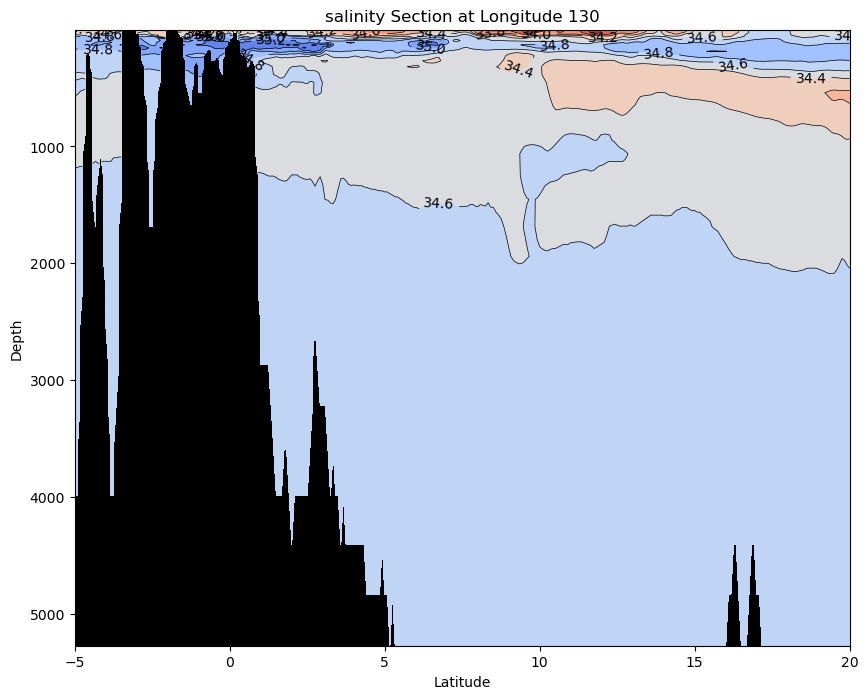

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import gsw 


salinity = ds['so'].sel(longitude=130, method='nearest')
salinity = salinity.values


plt.figure(figsize=(10, 8))
ax = plt.gca()  # 获取当前的Axes对象
ax.set_facecolor('black')  # 设置背景色为黑色

plt.contourf(latitude, depth,salinity,levels=10, cmap='coolwarm_r')
cor = plt.contour(latitude,depth,salinity,colors="k", levels=10, linewidths=0.5)
plt.clabel(cor, inline=True, colors='k')
highlight_lines = plt.contour(latitude, depth,salinity, levels=[], colors='white', linewidths=1.5)
plt.clabel(highlight_lines, inline=True, fontsize=10, colors='white')  # 添加标签
plt.title('salinity Section at Longitude {}'.format(130))
plt.xlabel('Latitude')
plt.ylabel('Depth')

ax.set_xlim(-5, 20)
plt.gca().invert_yaxis()  # 深度轴反向，使表面在上

plt.show()

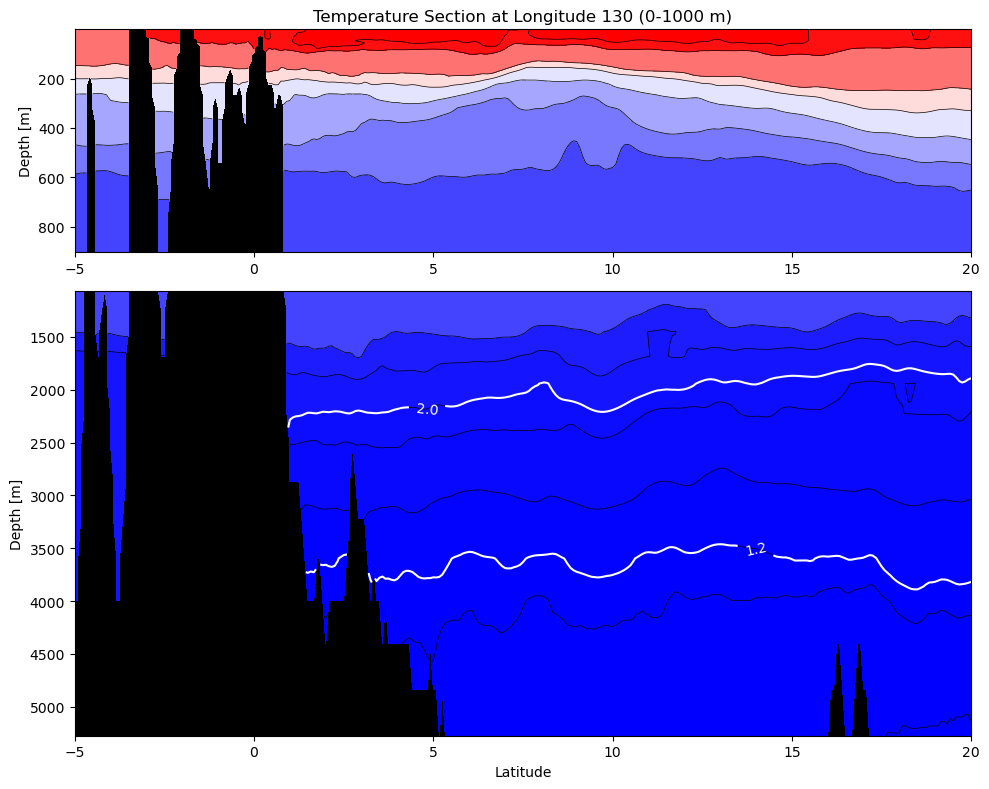

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import gsw


temperature = ds['thetao'].sel(longitude=130, method='nearest')
salinity = ds['so'].sel(longitude=130, method='nearest')
temperature = temperature.values
salinity = salinity.values
lat = ds['latitude'].values  # 获取纬度值

pressure = depth * 0.1
pressure_expanded = np.tile(pressure, (301, 1)).T
potential_temperature = gsw.pt0_from_t(salinity, temperature, pressure_expanded)

# 设置等值线的层级
levels = [1.12, 1.16, 1.2, 1.4, 1.8, 2.0, 2.5, 3, 7, 9, 12, 16, 19, 28, 30]

# 第一个图，显示0-1000m的部分
plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])

plt.subplot(gs[0])  # 使用两行一列布局的第一个子图
plt.gca().set_facecolor('black')
plt.contourf(lat, depth[depth <= 1000], potential_temperature[depth <= 1000], levels=levels, cmap='bwr', extend='both')
plt.contour(lat, depth[depth <= 1000], potential_temperature[depth <= 1000],colors="k", levels=levels, linewidths=0.5)
highlight_lines = plt.contour(lat, depth[depth <= 1000], potential_temperature[depth <= 1000], levels=[1.2,2.0], colors='white', linewidths=1.5)
plt.clabel(highlight_lines, inline=True, fontsize=10, colors='white')
plt.title('Temperature Section at Longitude 130 (0-1000 m)')
# plt.xlabel('Latitude')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

# 第二个图，显示1000m到底的部分
plt.subplot(gs[1])  # 使用两行一列布局的第二个子图
plt.gca().set_facecolor('black')
plt.contourf(lat, depth[depth > 1000], potential_temperature[depth > 1000], levels=levels, cmap='bwr', extend='both')
plt.contour(lat, depth[depth > 1000], potential_temperature[depth > 1000],colors="k", levels=levels, linewidths=0.5)
highlight_lines = plt.contour(lat, depth[depth > 1000], potential_temperature[depth > 1000], levels=[1.2, 2.0], colors='white', linewidths=1.5)
plt.clabel(highlight_lines, inline=True, fontsize=10, colors='white')
# plt.title('Temperature Section at Longitude 130 (1000 m to bottom)')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')
plt.gca().invert_yaxis()

plt.tight_layout()  # 调整布局以避免重叠
plt.show()
